In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
#from morfist import MixedRandomForest
from sklearn.manifold import TSNE 
from rdkit import DataStructs
from rdkit.Chem import rdMolHash


import time
import pickle
from mpl_toolkits.mplot3d import Axes3D
import random

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import pickle

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools
import rdkit

#from kerastuner.tuners import RandomSearch
#from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, Embedding
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Dense, Flatten, Activation
import time
from sklearn.metrics import r2_score
#import kerastuner as kt

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from numpy import array
from numpy.random import uniform
from numpy import hstack
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import pubchempy as pcp

In [2]:
df_pred = pickle.load(open("../Polyimide/Pred_SA_8million.pickle","rb"))

In [27]:
df_100 = df_pred.sample(n=100, random_state=1)

In [28]:
df_100

,Smiles,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Smi_A,Smi_Dianhydride,SA_A,SA_Dianhydride
4928704,*CCCCCC(C)(CC)N(C(C)=O)C(=O)CS(=O)(=O)CCS(=O)(...,1.121155,1.448274,0.059251,38.096951,202.426300,48.468544,0.127404,CCC(C)(CCCCCN=C=O)N=C=O,CC(=O)OC(=O)CS(=O)(=O)CCS(=O)(=O)CC(=O)OC(=O)C,4.185038,3.060867
6204379,*C1NN2C=C(c3cccc(CN4CCC(N5C(=O)c6cc(C#CC(c7ccc...,1.021558,3.333401,0.124725,345.402557,426.734497,770.975830,0.035589,C1CN(CCC1N)CC2=CC(=CC=C2)C3=CN4C(=C(C(N4)N)C5=...,C1=CC=C(C=C1)C(C#CC2=CC3=C4C(=CC(=C5C4=C2C6=C7...,3.726741,3.748501
6184285,*CCCCCOC(CCCCCCCCCCCCCCCCC)N1C(=O)c2cc(Oc3cccc...,1.030012,2.328971,0.059955,127.997543,459.262360,124.867508,0.085320,CCCCCCCCCCCCCCCCCC(N)OCCCCCN,CC1=CC=CC=C1OC2=CC3=C(C=C2C4=CC5=C(C=C4OC6=CC=...,2.757518,2.691569
6260077,*c1ccc(C#Cc2c(C)nc(N3C(=O)[C@@H]4[C@H](C3=O)[C...,1.179531,2.337159,0.092856,282.418365,409.443420,320.180786,0.090502,CC1=C(C(=NC(=N1)N)C2=CC=CC(=C2)CN(C)C)C#CC3=CN...,C1C[C@]2(C[C@H]3C[C@@H]2[C@H]4[C@@H]3C(=O)OC4=...,2.667329,7.046687
642544,*NC(c1cccnc1N1C(=O)[C@H]2[C@@H](C1=O)C1(NC(=O)...,1.044672,2.288649,0.104626,318.289124,227.735474,471.948120,0.068993,C1CC(SC1)C(C2=C(N=CC=C2)N)NN,C1=CC=C(C=C1)C(=O)NC23C=CC([C@@H]4[C@H]2C(=O)O...,4.034402,5.145581
...,...,...,...,...,...,...,...,...,...,...,...,...
6893980,*C1CCC(CC2CCC(N3C(=O)c4ccc5c6c(CCCCCC)cc7c8c(c...,1.102020,1.823521,0.051809,116.120651,336.452209,231.142670,0.062866,CCC1(CC(CCC1N)CC2CCC(C(C2)(CC)CC)N)CC,CCCCCCC1=C2C3=C4C(=C(C=C5C4=C(C=C3)C(=O)OC5=O)...,4.691265,3.119882
5167649,*CCCCNN1C(=O)C2CC(C3CC(=O)N(*)C3=O)c3ccccc3C2C1=O,1.270384,2.277931,0.066785,192.095795,282.351135,319.448547,0.060052,C(CCNN)CN,C1C(C2=CC=CC=C2C3C1C(=O)OC3=O)C4CC(=O)OC4=O,2.627176,3.910963
4433068,*c1ccc(C)c(NC(=O)OC(CC)C(CCCOOOC(=O)Nc2cc(N3C(...,0.925836,2.556058,0.070860,285.934235,274.434448,607.031738,0.090898,CCC(C(CCCOOOC(=O)NC1=C(C=CC(=C1)N=C=O)C)C(C)C(...,C1=CC=C(C=C1)C(C#CC2=C3C4=C5C(=C(C=C6C5=C(C=C4...,4.605147,3.734971
6351110,*CCOc1ccc(CCCN2C(=O)C3CC(C2=O)C2C(=O)N(*)C(=O)...,1.313709,1.899718,0.073970,153.935181,291.104309,285.310547,0.062978,C1=CC(=CC=C1CCCN)OCCN,C1C2C3CC(=O)OC(=O)C3C1C(=O)OC2=O,1.767264,4.880522


In [46]:
df_200 = df_pred.sample(n=100, random_state=11)

In [48]:
df_new = df_200.merge(df_100, how='left', indicator=True)
df_new = df_new[df_new['_merge'] == 'left_only']
df_new

,Smiles,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Smi_A,Smi_Dianhydride,SA_A,SA_Dianhydride,_merge
0,*Cc1cnc(Cc2ccncc2)nc1N(C(C)=O)C(=O)CCCC(=O)Oc1...,1.148361,1.541219,0.035318,46.583214,194.357056,41.363007,0.068574,C1=CN=CC=C1CC2=NC=C(C(=N2)N)CN,CC(=O)OC(=O)CCCC(=O)OC1=CC=CC=C1OC(=O)CCCC(=O)...,2.410219,2.499092,left_only
1,*Cc1cn2ccnc(N(C(=O)c3ccccc3C(=O)O)C(=O)c3ccccc...,1.197507,2.439477,0.099062,189.473297,332.887695,148.225891,0.064276,C1=CN2C=C(N=C2C(=N1)N)CN,C1=CC=C(C(=C1)C(=O)O)C(=O)OC(=O)C2=CC=CC=C2C(=...,2.912837,2.009459,left_only
2,*C(=C)c1cc(-c2ccc3cc(N4C(=O)[C@@H]5C6C(Cl)=C(F...,1.366223,1.986187,0.093445,259.145386,278.093323,312.899048,0.080090,COC1=C(C=C(C=C1)C2=CC3=C(C=C2)C=C(C=C3)N)C(=C)N,[C@@H]12[C@@H](C3[C@H]4[C@@H](C1C(=C3Cl)F)C(=O...,2.214003,5.465245,left_only
3,*CCCC(SC)(SC)C(CN1C(=O)C2Cc3c(c(OCCCC)c4c(c3OC...,1.124912,1.764033,0.060985,86.048553,283.124176,197.491165,0.059107,CSC(CN=C=O)C(CCCN=C=O)(SC)SC,CCCCOC1=C2CC3C(CC2=C(C4=C1CC5C(C4)C(=O)OC5=O)O...,4.953304,4.435519,left_only
4,*c1cc(Cc2ccc(N3C(=O)[C@H]4C5C=CC([C@H]6C(=O)N(...,1.329027,2.579051,0.083586,350.139526,349.630219,370.767273,0.053960,C1=CC=C2C(=C1)C(=CC=C2N)CC3=CC(=NC=C3)N,C1=CC2[C@@H]3[C@H](C1[C@H]4[C@@H]2C(=O)OC4=O)C...,2.105978,5.062899,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,*N1C(=O)c2cc(Br)c3c4ccc5c6c(ccc(c7c(Br)cc(c2c3...,1.280041,2.672215,0.070500,224.380142,345.922668,278.768005,0.110019,CCCC(CCC(C)(C)C)(N=C=O)N=C=O,C1=CC2=C3C(=CC=C4C3=C1C5=C(C=C6C7=C5C4=C(C=C7C...,3.942829,3.115975,left_only
96,*CC(F)(F)CCCCCCCCCCCCCCCCC(F)(F)CN(C(C)=O)C(=O...,1.115368,2.233057,0.062715,28.098810,195.396637,-21.056744,0.133518,C(CCCCCCCCC(CN=C=O)(F)F)CCCCCCCC(CN=C=O)(F)F,CC(=O)OC(=O)CCS(=O)(=O)CC1=CC=C(C=C1)CS(=O)(=O...,3.144411,2.749861,left_only
97,*CCCC(N)CN1C(=O)c2ccc3c4c(cc(Br)c(c24)C1=O)C(=...,1.379149,6.713123,0.071968,167.683640,393.629822,314.079346,0.091144,C(CC(CN=C=O)N)CN=C=O,C1=CC2=C3C4=C1C(=O)OC(=O)C4=CC(=C3C(=O)OC2=O)Br,4.258136,2.962830,left_only
98,*NC(Cc1ccc(C)cc1)Cc1cccnc1N1C(=O)c2cc3c(cc2C1=...,1.116290,2.083263,0.071282,239.343796,420.419922,181.444122,0.096465,CC1=CC=C(C=C1)CC(CC2=C(N=CC=C2)N)NN,CC(C)C12C3=CC=CC=C3C(C4=C1C=C5C(=C4)C(=O)OC5=O...,2.699862,4.138299,left_only


In [32]:
df_100['Smiles'].drop_duplicates()

4928704                              CCC(C)(CCCCCN=C=O)N=C=O
6204379    C1CN(CCC1N)CC2=CC(=CC=C2)C3=CN4C(=C(C(N4)N)C5=...
6184285                         CCCCCCCCCCCCCCCCCC(N)OCCCCCN
6260077    CC1=C(C(=NC(=N1)N)C2=CC=CC(=C2)CN(C)C)C#CC3=CN...
642544                          C1CC(SC1)C(C2=C(N=CC=C2)N)NN
                                 ...                        
6893980                CCC1(CC(CCC1N)CC2CCC(C(C2)(CC)CC)N)CC
5167649                                            C(CCNN)CN
4433068    CCC(C(CCCOOOC(=O)NC1=C(C=CC(=C1)N=C=O)C)C(C)C(...
6351110                                C1=CC(=CC=C1CCCN)OCCN
1733937                                        CCC(C)(CCN)NN
Name: Smi_A, Length: 100, dtype: object

In [55]:
one = set(df_new['Smi_Dianhydride'].drop_duplicates())
two = set(df_100['Smi_Dianhydride'].drop_duplicates())
one & two

{'C(CCCNC(=O)OC(=O)C(F)(F)F)CCNC(=O)OC(=O)C(F)(F)F',
 'C12=C3C4=C5C6=C(C(=C4Br)Br)C(=O)OC(=O)C6=C(C(=C5C1=C(C(=C7C2=C(C(=C3Br)Br)C(=O)OC7=O)Br)Br)Br)Br',
 'C1=CC2=C(C=C1C(=O)C3=CC4=C(C=C3)C(=O)OC4=O)C(=O)OC2=O',
 'C1=CC2=C3C(=CC(=C4C3=C1C5=C(C=C6C7=C(C=CC4=C57)C(=O)OC6=O)C(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)C(C(C(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)(F)F)C(=O)OC2=O',
 'C1=CC2=C3C(=CC=C4C3=C1C5=C(C=C6C7=C5C4=C(C=C7C(=O)OC6=O)Br)Br)C(=O)OC2=O',
 'C1=CC2=C3C4=C1C(=O)OC(=O)C4=CC(=C3C(=O)OC2=O)Br',
 'C1C2=C3C(=CC=C4C3=C(CC(=O)OC(=O)C4)C=C2)CC(=O)OC1=O',
 'C1C2C(C3C1C(=O)OC3=O)C(=O)OC2=O',
 'C1C2C(CC3=C1C(=C4CC5C(CC4=C3C6=CC=CC=C6)C(=O)OC5=O)C7=CC=CC=C7)C(=O)OC2=O',
 'C1C2C(CC3=C1C(=C4CC5C(CC4=C3OC6=CC=CC=C6)C(=O)OC5=O)OC7=CC=CC=C7)C(=O)OC2=O',
 'C1C2C3CC(=O)OC(=O)C3C1C(=O)OC2=O',
 'C1C2[C@H]3[C@@H](C1[C@@H]4[C@H]2C(=O)OC4=O)C(=O)OC3=O',
 'C1CC2[C@@H]3[C@H](C1[C@H]4[C@@H]2C(=O)OC4=O)C(=O)OC3=O',
 'C1C[C@]2(C[C@H]3C[C@@H]2[C@H]4[C@@H]3C(=O)OC4=O)C(=O)[C@@]15C[C@

In [23]:
# generate 1.smi ~ 100.smi for monomer A
for i in range(100):
    with open('{}.smi'.format(i + 1), 'w') as f:
        f.write(df_100['Smi_A'].drop_duplicates().iloc[i])

In [7]:
df_100['Smi_Dianhydride'].drop_duplicates()

4928704       CC(=O)OC(=O)CS(=O)(=O)CCS(=O)(=O)CC(=O)OC(=O)C
6204379    C1=CC=C(C=C1)C(C#CC2=CC3=C4C(=CC(=C5C4=C2C6=C7...
6184285    CC1=CC=CC=C1OC2=CC3=C(C=C2C4=CC5=C(C=C4OC6=CC=...
6260077    C1C[C@]2(C[C@H]3C[C@@H]2[C@H]4[C@@H]3C(=O)OC4=...
642544     C1=CC=C(C=C1)C(=O)NC23C=CC([C@@H]4[C@H]2C(=O)O...
                                 ...                        
4344152      C1=CC2=C3C4=C1C(=O)OC(=O)C4=CC(=C3C(=O)OC2=O)Br
6076845    C1C2[C@H]3[C@@H](C1[C@@H]4[C@H]2C(=O)OC4=O)C(=...
5751636           C[As]1C2C(C(=O)OC2=O)[As](C3C1C(=O)OC3=O)C
6893980    CCCCCCC1=C2C3=C4C(=C(C=C5C4=C(C=C3)C(=O)OC5=O)...
5167649          C1C(C2=CC=CC=C2C3C1C(=O)OC3=O)C4CC(=O)OC4=O
Name: Smi_Dianhydride, Length: 78, dtype: object

In [24]:
# generate 101.smi ~ 178.smi for monomer B
for i in range(78):
    with open('{}.smi'.format(i + 101), 'w') as f:
        f.write(df_100['Smi_Dianhydride'].drop_duplicates().iloc[i])

In [8]:
df_100['Smi_A_folder'] = [i+1 for i in range(100)]
df_100['Smi_Dianhydride_folder'] = 0

In [9]:
list_78 = list(df_100['Smi_Dianhydride'].drop_duplicates())

In [10]:
for i in range(78):
    df_100.loc[df_100[df_100['Smi_Dianhydride'] == list_78[i]].index,'Smi_Dianhydride_folder'] = i + 101

In [11]:
df_100.index = np.arange(1, len(df_100) + 1)

In [12]:
df_100['flag'] = True

In [13]:
for i in [6,9,22,41,57,75,79,83,109,137,146,147,148,167,176]:
    if len(df_100[df_100['Smi_A_folder'] == i]) > 0:
        print(df_100[df_100['Smi_A_folder'] == i][['Smi_A_folder','Smi_Dianhydride_folder']])
        df_100.loc[df_100[df_100['Smi_A_folder'] == i].index,'flag'] = False
    if len(df_100[df_100['Smi_Dianhydride_folder'] == i]) > 0:
        print(df_100[df_100['Smi_Dianhydride_folder'] == i][['Smi_A_folder','Smi_Dianhydride_folder']])
        df_100.loc[df_100[df_100['Smi_Dianhydride_folder'] == i].index,'flag'] = False

   Smi_A_folder  Smi_Dianhydride_folder
6             6                     106
   Smi_A_folder  Smi_Dianhydride_folder
9             9                     108
    Smi_A_folder  Smi_Dianhydride_folder
22            22                     121
    Smi_A_folder  Smi_Dianhydride_folder
41            41                     136
    Smi_A_folder  Smi_Dianhydride_folder
57            57                     148
    Smi_A_folder  Smi_Dianhydride_folder
75            75                     163
    Smi_A_folder  Smi_Dianhydride_folder
79            79                     167
    Smi_A_folder  Smi_Dianhydride_folder
83            83                     162
    Smi_A_folder  Smi_Dianhydride_folder
10            10                     109
    Smi_A_folder  Smi_Dianhydride_folder
42            42                     137
    Smi_A_folder  Smi_Dianhydride_folder
53            53                     146
    Smi_A_folder  Smi_Dianhydride_folder
56            56                     147
63            63    

In [14]:
len(df_100[df_100['flag'] == False])

16

In [15]:
df_100[df_100['flag'] == False]['Smi_A_folder'].values

array([  6,   9,  10,  22,  41,  42,  53,  56,  57,  63,  75,  79,  83,
        93,  94, 100], dtype=int64)

In [16]:
df_100[df_100['flag'] == False]['Smi_Dianhydride_folder'].values

array([106, 108, 109, 121, 136, 137, 146, 147, 148, 147, 163, 167, 162,
       148, 176, 167], dtype=int64)

In [18]:
df_100.columns

Index(['Smiles', 'DensityValue', 'TensileModulusValue', 'TensileBreakValue',
       'TgValue', 'TdValue', 'TmValue', 'TensileYieldValue', 'Smi_A',
       'Smi_Dianhydride', 'SA_A', 'SA_Dianhydride', 'Smi_A_folder',
       'Smi_Dianhydride_folder', 'flag'],
      dtype='object')

### React 7-mer

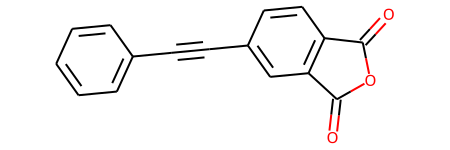

In [76]:
#https://www.sciencedirect.com/science/article/pii/S1359835X06003198
PEPA = 'C1=CC(=CC=C1)C#CC2=CC3=C(C=C2)C(OC3=O)=O'
Chem.MolFromSmiles(PEPA)

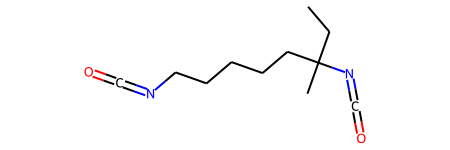

In [77]:
diisocyanate = df_100.iloc[0]['Smi_A']
Chem.MolFromSmiles(diisocyanate)

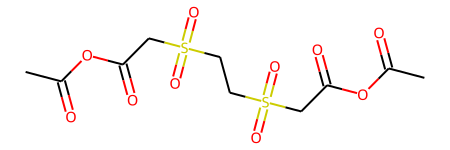

In [78]:
dianhydride = df_100.iloc[0]['Smi_Dianhydride']
Chem.MolFromSmiles(dianhydride)

In [79]:
#Dianhydride and Diisocyanate
rxn = AllChem.ReactionFromSmarts('[*:2]C(=O)OC(=O)[*:1].[*:9][N:8]=C=O >> [*:2]C(=O)[N:8]([*:9])C(=O)[*:1]')
rxn_1 = AllChem.ReactionFromSmarts("([*:2]C(=O)OC(=O)[*:1])>>[*:2]C(=O)[N:8]([*:9])C(=O)[*:1]")
rxn_2 = AllChem.ReactionFromSmarts("([*:9][N:8]=C=O)>>[*][*:9]")

In [80]:
reactants = (Chem.MolFromSmiles(dianhydride), Chem.MolFromSmiles(diisocyanate))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])

reactants = (Chem.MolFromSmiles(polyimide), Chem.MolFromSmiles(polyimide))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])

reactants = (Chem.MolFromSmiles(polyimide), Chem.MolFromSmiles(diisocyanate))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])

reactants = (Chem.MolFromSmiles(PEPA), Chem.MolFromSmiles(polyimide))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])

reactants = (Chem.MolFromSmiles(PEPA), Chem.MolFromSmiles(polyimide))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])            

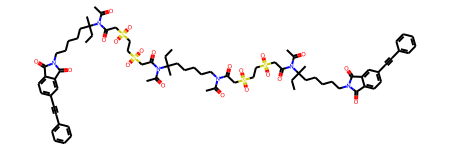

In [81]:
Chem.MolFromSmiles(polyimide)

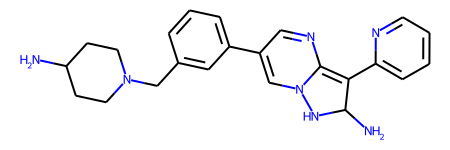

In [82]:
diamine = df_100.iloc[1]['Smi_A']
Chem.MolFromSmiles(diamine)

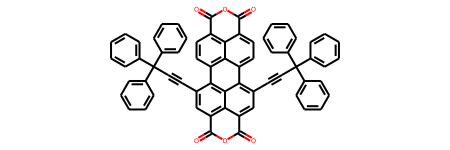

In [83]:
dianhydride = df_100.iloc[1]['Smi_Dianhydride']
Chem.MolFromSmiles(dianhydride)

In [84]:
# Dianhydride and Diamine
rxn = AllChem.ReactionFromSmarts('[*:2]C(=O)OC(=O)[*:1].[NH2!R:8]-[*:9] >> [*:2]C(=O)[N:8]([*:9])C(=O)[*:1]')
rxn_1 = AllChem.ReactionFromSmarts("([*:2]C(=O)OC(=O)[*:1])>>[*:2]C(=O)[N:8]([*:9])C(=O)[*:1]")
rxn_2 = AllChem.ReactionFromSmarts("([NH2:1][*:2])>>[*][*:2]")

In [85]:
reactants = (Chem.MolFromSmiles(dianhydride), Chem.MolFromSmiles(diamine))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])

reactants = (Chem.MolFromSmiles(polyimide), Chem.MolFromSmiles(polyimide))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])

reactants = (Chem.MolFromSmiles(polyimide), Chem.MolFromSmiles(diamine))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])

reactants = (Chem.MolFromSmiles(PEPA), Chem.MolFromSmiles(polyimide))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])

reactants = (Chem.MolFromSmiles(PEPA), Chem.MolFromSmiles(polyimide))
products = rxn.RunReactants(reactants)
polyimide = Chem.MolToSmiles(products[0][0])            

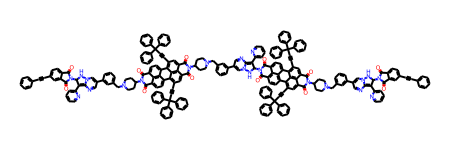

In [86]:
Chem.MolFromSmiles(polyimide)

In [98]:
df_100['7mer'] = np.nan

for i in range(100):
    dianhydride = df_100.iloc[i]['Smi_Dianhydride']
    
    smi = df_100.iloc[i]['Smi_A']
    m = Chem.MolFromSmiles(smi)
    
    if m != None:
        if len(m.GetSubstructMatches(Chem.MolFromSmarts('[NH2]'))) == 2:
            diamine = smi
            
            # Dianhydride and Diamine
            rxn = AllChem.ReactionFromSmarts('[*:2]C(=O)OC(=O)[*:1].[NH2!R:8]-[*:9] >> [*:2]C(=O)[N:8]([*:9])C(=O)[*:1]')
            rxn_1 = AllChem.ReactionFromSmarts("([*:2]C(=O)OC(=O)[*:1])>>[*:2]C(=O)[N:8]([*:9])C(=O)[*:1]")
            rxn_2 = AllChem.ReactionFromSmarts("([NH2:1][*:2])>>[*][*:2]")

            reactants = (Chem.MolFromSmiles(dianhydride), Chem.MolFromSmiles(diamine))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])

            reactants = (Chem.MolFromSmiles(polyimide), Chem.MolFromSmiles(polyimide))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])

            reactants = (Chem.MolFromSmiles(polyimide), Chem.MolFromSmiles(diamine))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])

            reactants = (Chem.MolFromSmiles(PEPA), Chem.MolFromSmiles(polyimide))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])

            reactants = (Chem.MolFromSmiles(PEPA), Chem.MolFromSmiles(polyimide))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])            
    
    if m != None:
        if len(m.GetSubstructMatches(Chem.MolFromSmarts('N=C=O'))) == 2:
            diisocyanate = smi
            
            #Dianhydride and Diisocyanate
            rxn = AllChem.ReactionFromSmarts('[*:2]C(=O)OC(=O)[*:1].[*:9][N:8]=C=O >> [*:2]C(=O)[N:8]([*:9])C(=O)[*:1]')
            rxn_1 = AllChem.ReactionFromSmarts("([*:2]C(=O)OC(=O)[*:1])>>[*:2]C(=O)[N:8]([*:9])C(=O)[*:1]")
            rxn_2 = AllChem.ReactionFromSmarts("([*:9][N:8]=C=O)>>[*][*:9]")

            reactants = (Chem.MolFromSmiles(dianhydride), Chem.MolFromSmiles(diisocyanate))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])

            reactants = (Chem.MolFromSmiles(polyimide), Chem.MolFromSmiles(polyimide))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])

            reactants = (Chem.MolFromSmiles(polyimide), Chem.MolFromSmiles(diisocyanate))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])

            reactants = (Chem.MolFromSmiles(PEPA), Chem.MolFromSmiles(polyimide))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])

            reactants = (Chem.MolFromSmiles(PEPA), Chem.MolFromSmiles(polyimide))
            products = rxn.RunReactants(reactants)
            polyimide = Chem.MolToSmiles(products[0][0])   

    df_100.loc[i+1,'7mer'] = polyimide

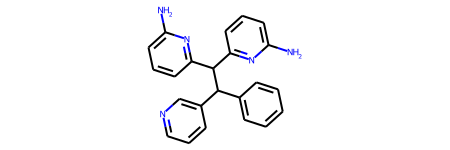

In [132]:
i = 9
Chem.MolFromSmiles(df_100.loc[i,'Smi_A'])

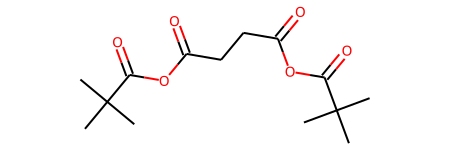

In [133]:
Chem.MolFromSmiles(df_100.loc[i,'Smi_Dianhydride'])

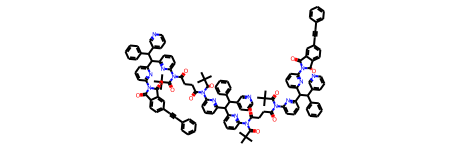

In [134]:
Chem.MolFromSmiles(df_100.loc[i,'7mer'])

In [136]:
df_100[df_100['flag'] == True]

,Smiles,DensityValue,TensileModulusValue,TensileBreakValue,TgValue,TdValue,TmValue,TensileYieldValue,Smi_A,Smi_Dianhydride,SA_A,SA_Dianhydride,Smi_A_folder,Smi_Dianhydride_folder,flag,7mer
1,*CCCCCC(C)(CC)N(C(C)=O)C(=O)CS(=O)(=O)CCS(=O)(...,1.121155,1.448274,0.059251,38.096951,202.426300,48.468544,0.127404,CCC(C)(CCCCCN=C=O)N=C=O,CC(=O)OC(=O)CS(=O)(=O)CCS(=O)(=O)CC(=O)OC(=O)C,4.185038,3.060867,1,101,True,CCC(C)(CCCCCN1C(=O)c2ccc(C#Cc3ccccc3)cc2C1=O)N...
2,*C1NN2C=C(c3cccc(CN4CCC(N5C(=O)c6cc(C#CC(c7ccc...,1.021558,3.333401,0.124725,345.402557,426.734497,770.975830,0.035589,C1CN(CCC1N)CC2=CC(=CC=C2)C3=CN4C(=C(C(N4)N)C5=...,C1=CC=C(C=C1)C(C#CC2=CC3=C4C(=CC(=C5C4=C2C6=C7...,3.726741,3.748501,2,102,True,O=C1c2ccc3c4c(C#CC(c5ccccc5)(c5ccccc5)c5ccccc5...
3,*CCCCCOC(CCCCCCCCCCCCCCCCC)N1C(=O)c2cc(Oc3cccc...,1.030012,2.328971,0.059955,127.997543,459.262360,124.867508,0.085320,CCCCCCCCCCCCCCCCCC(N)OCCCCCN,CC1=CC=CC=C1OC2=CC3=C(C=C2C4=CC5=C(C=C4OC6=CC=...,2.757518,2.691569,3,103,True,CCCCCCCCCCCCCCCCCC(OCCCCCN1C(=O)c2ccc(C#Cc3ccc...
4,*c1ccc(C#Cc2c(C)nc(N3C(=O)[C@@H]4[C@H](C3=O)[C...,1.179531,2.337159,0.092856,282.418365,409.443420,320.180786,0.090502,CC1=C(C(=NC(=N1)N)C2=CC=CC(=C2)CN(C)C)C#CC3=CN...,C1C[C@]2(C[C@H]3C[C@@H]2[C@H]4[C@@H]3C(=O)OC4=...,2.667329,7.046687,4,104,True,Cc1nc(N2C(=O)[C@@H]3[C@H](C2=O)[C@@H]2C[C@H]3[...
5,*NC(c1cccnc1N1C(=O)[C@H]2[C@@H](C1=O)C1(NC(=O)...,1.044672,2.288649,0.104626,318.289124,227.735474,471.948120,0.068993,C1CC(SC1)C(C2=C(N=CC=C2)N)NN,C1=CC=C(C=C1)C(=O)NC23C=CC([C@@H]4[C@H]2C(=O)O...,4.034402,5.145581,5,105,True,O=C(NC12C=CC(c3ccccc3)([C@H]3C(=O)N(c4ncccc4C(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,*CCCn1cc(CCCN2C(=O)[C@H]3[C@@H](C2=O)C2(NC(=O)...,1.218809,1.586158,0.052824,142.477829,163.422791,333.075531,0.067333,COC1=CC2=C(C=C1)N(C=C2CCCN)CCCN,C1=CC=C(C=C1)C(=O)NC23C=CC([C@@H]4[C@H]2C(=O)O...,2.232028,5.380720,95,113,True,COc1ccc2c(c1)c(CCCN1C(=O)[C@H]3[C@@H](C1=O)C1(...
96,*C1CCC(CC2CCC(N3C(=O)c4ccc5c6c(CCCCCC)cc7c8c(c...,1.102020,1.823521,0.051809,116.120651,336.452209,231.142670,0.062866,CCC1(CC(CCC1N)CC2CCC(C(C2)(CC)CC)N)CC,CCCCCCC1=C2C3=C4C(=C(C=C5C4=C(C=C3)C(=O)OC5=O)...,4.691265,3.119882,96,177,True,CCCCCCc1cc2c3c(ccc4c5c(CCCCCC)cc6c7c(ccc(c1c34...
97,*CCCCNN1C(=O)C2CC(C3CC(=O)N(*)C3=O)c3ccccc3C2C1=O,1.270384,2.277931,0.066785,192.095795,282.351135,319.448547,0.060052,C(CCNN)CN,C1C(C2=CC=CC=C2C3C1C(=O)OC3=O)C4CC(=O)OC4=O,2.627176,3.910963,97,178,True,O=C1CC(C2CC3C(=O)N(NCCCCN4C(=O)c5ccc(C#Cc6cccc...
98,*c1ccc(C)c(NC(=O)OC(CC)C(CCCOOOC(=O)Nc2cc(N3C(...,0.925836,2.556058,0.070860,285.934235,274.434448,607.031738,0.090898,CCC(C(CCCOOOC(=O)NC1=C(C=CC(=C1)N=C=O)C)C(C)C(...,C1=CC=C(C=C1)C(C#CC2=C3C4=C5C(=C(C=C6C5=C(C=C4...,4.605147,3.734971,98,107,True,CCC(OC(=O)Nc1cc(N2C(=O)c3ccc(C#Cc4ccccc4)cc3C2...


In [124]:
# generate 7mer_1.smi ~ 7mer_100.smi for 7mer
for i in range(84):
    with open('7mer_{}.smi'.format(df_100[df_100['flag'] == True].index[i]), 'w') as f:
        f.write(df_100[df_100['flag'] == True]['7mer'].iloc[i])

In [ ]:
[2,6,7,9,10,16,17,21,22,23,24,25,28,29,41,42,46,53,56,57,58,59,63,65,72,75,78,79,83,88,90,93,94,96,98,99,100]